In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('heart_disease_uci.csv') #ucitavanje podataka u dataframe

df.head(8)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0


In [108]:
df.nunique() 

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [109]:
df.drop(('id'), axis=1, inplace=True) #Jer samo raste do broja redova
df.drop(('dataset'), axis=1, inplace=True) #Jer je nepotrebno
df.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0


In [110]:
feature_mapping = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainLevel',
    'trestbps': 'RestingBloodPressure',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalch': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'DepressionLevel',
    'slope': 'PeakExerciseCondition',
    'ca': 'NumberOfVesselsColored',
    'thal': 'ThalliumTestResult',
    'num': 'HeartFailureRisk - Target'
}
    
df = df.rename(columns=feature_mapping)
df.head()

#mapiranje značajki na normalnija imena kako bi se lakše isčitavalo na vizualizacijama i općenito čitalo

,Age,Sex,ChestPainLevel,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,DepressionLevel,PeakExerciseCondition,NumberOfVesselsColored,ThalliumTestResult,HeartFailureRisk - Target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [111]:
#ovdje bi se moglo postaviti da je target kao u članku samo 0 i 1
#df['HeartFailureRisk - Target'] = df['HeartFailureRisk - Target'].replace([1, 2, 3, 4], 1) 
#df.head(8)

In [112]:
df.isna().sum() #ispis po značajkama koliko kojih nedostaje

Age                            0
Sex                            0
ChestPainLevel                 0
RestingBloodPressure          59
Cholesterol                   30
FastingBloodSugar             90
RestingECG                     2
MaxHeartRate                  55
ExerciseInducedAngina         55
DepressionLevel               62
PeakExerciseCondition        309
NumberOfVesselsColored       611
ThalliumTestResult           486
HeartFailureRisk - Target      0
dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        920 non-null    int64  
 1   Sex                        920 non-null    object 
 2   ChestPainLevel             920 non-null    object 
 3   RestingBloodPressure       861 non-null    float64
 4   Cholesterol                890 non-null    float64
 5   FastingBloodSugar          830 non-null    object 
 6   RestingECG                 918 non-null    object 
 7   MaxHeartRate               865 non-null    float64
 8   ExerciseInducedAngina      865 non-null    object 
 9   DepressionLevel            858 non-null    float64
 10  PeakExerciseCondition      611 non-null    object 
 11  NumberOfVesselsColored     309 non-null    float64
 12  ThalliumTestResult         434 non-null    object 
 13  HeartFailureRisk - Target  920 non-null    int64  

In [114]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,DepressionLevel,NumberOfVesselsColored,HeartFailureRisk - Target
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [115]:
import pandas as pd

# Popunjavanje numeričkih vrijednosti meanom i medianom
df['RestingBloodPressure'].fillna(df['RestingBloodPressure'].mean(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
df['MaxHeartRate'].fillna(df['MaxHeartRate'].median(), inplace=True)
df['DepressionLevel'].fillna(df['DepressionLevel'].mean(), inplace=True)

# Popunjavanje kategoričkih vrijednosti s funkcijom mode, jer ona postavlja vrijednosti koje nedostaju na vrijednost koja se najčešće pojavljuje
df['FastingBloodSugar'].fillna(df['FastingBloodSugar'].mode()[0], inplace=True)
df['RestingECG'].fillna(df['RestingECG'].mode()[0], inplace=True)
df['ExerciseInducedAngina'].fillna(df['ExerciseInducedAngina'].mode()[0], inplace=True)
df['PeakExerciseCondition'].fillna(df['PeakExerciseCondition'].mode()[0], inplace=True)
df['ThalliumTestResult'].fillna(df['ThalliumTestResult'].mode()[0], inplace=True)

# izbacivanje NumberOfVesselsColored značajke, jer joj ne dostaje preko 60% vrijednosti
df.drop(columns=['NumberOfVesselsColored'], inplace=True)

print(df.isnull().sum())


Age                          0
Sex                          0
ChestPainLevel               0
RestingBloodPressure         0
Cholesterol                  0
FastingBloodSugar            0
RestingECG                   0
MaxHeartRate                 0
ExerciseInducedAngina        0
DepressionLevel              0
PeakExerciseCondition        0
ThalliumTestResult           0
HeartFailureRisk - Target    0
dtype: int64


In [116]:
df.head(8)

,Age,Sex,ChestPainLevel,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,DepressionLevel,PeakExerciseCondition,ThalliumTestResult,HeartFailureRisk - Target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,normal,0


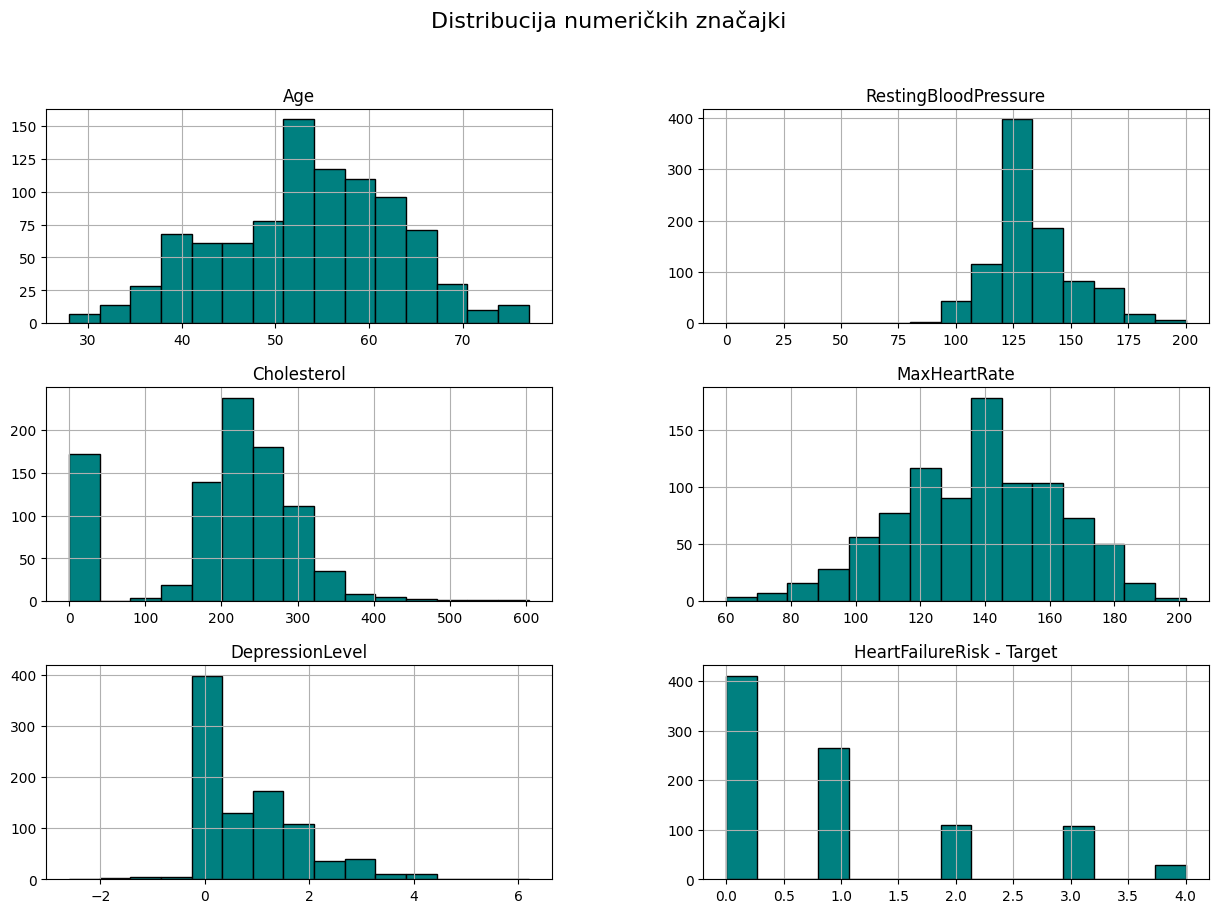

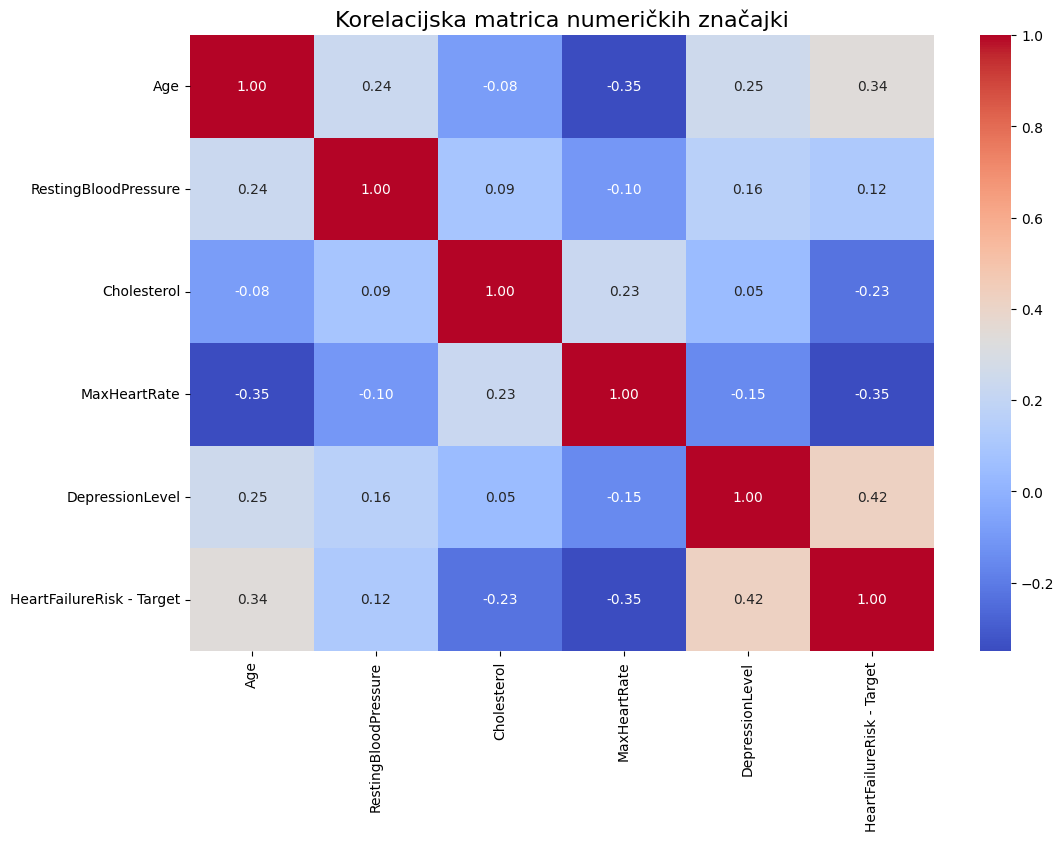

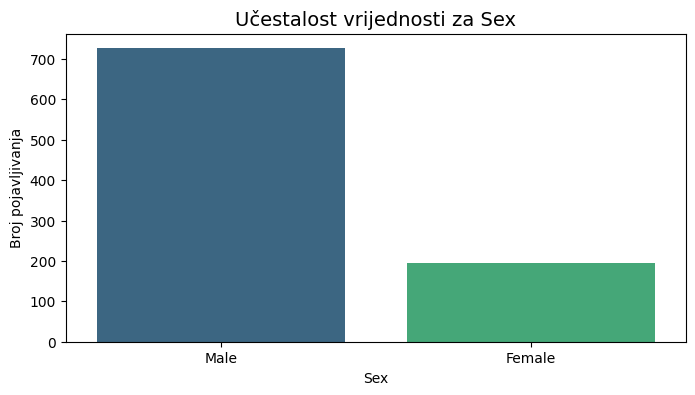

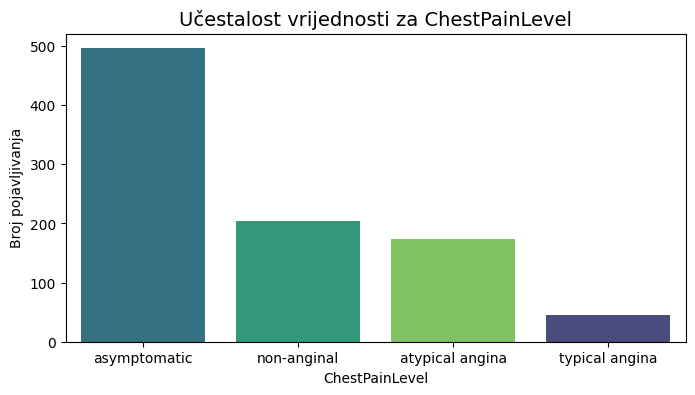

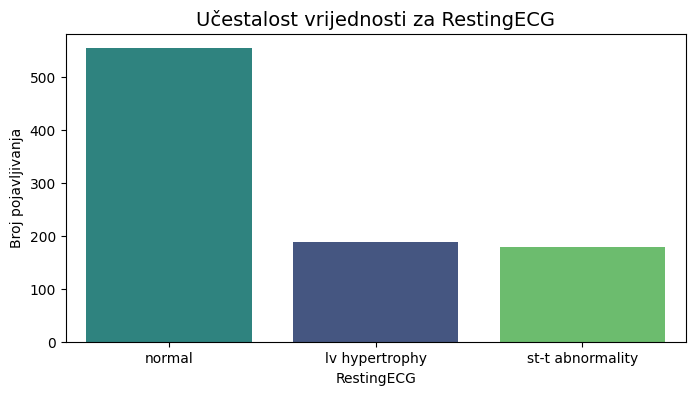

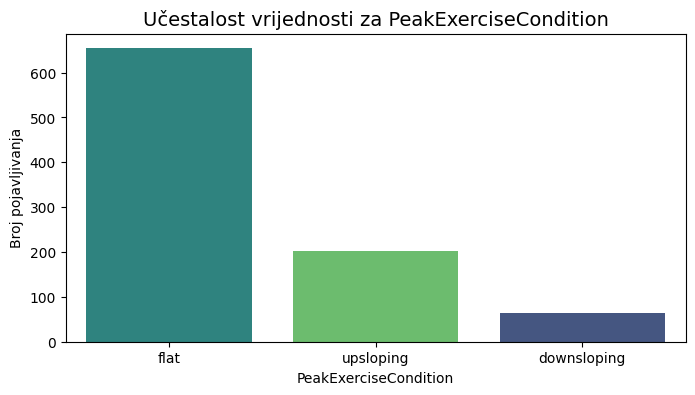

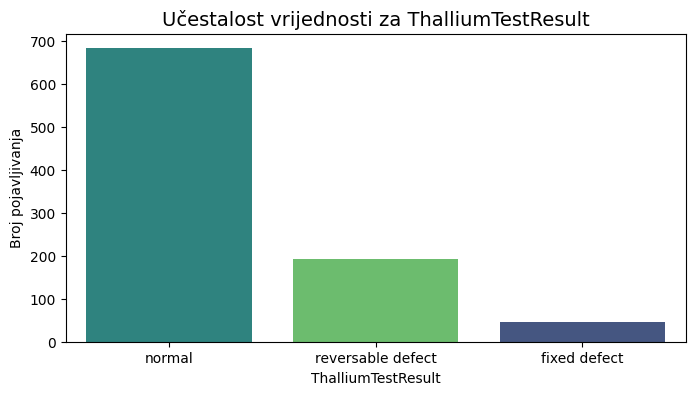

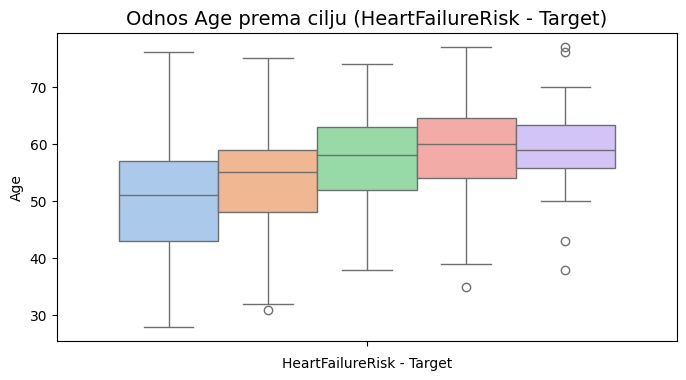

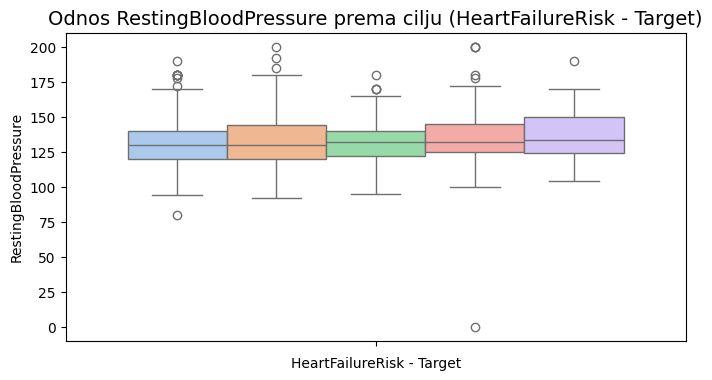

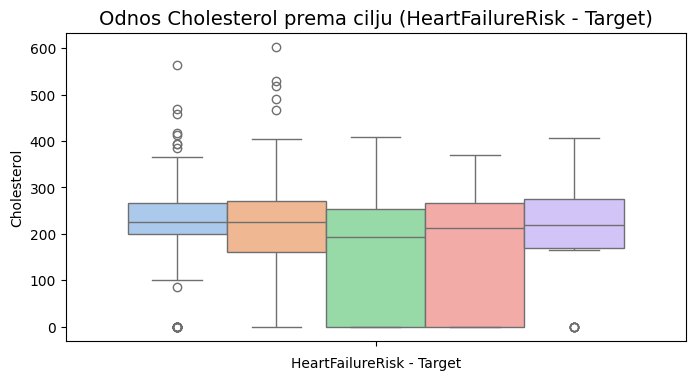

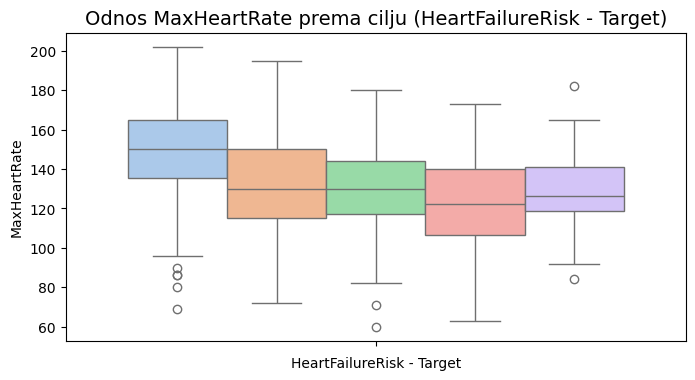

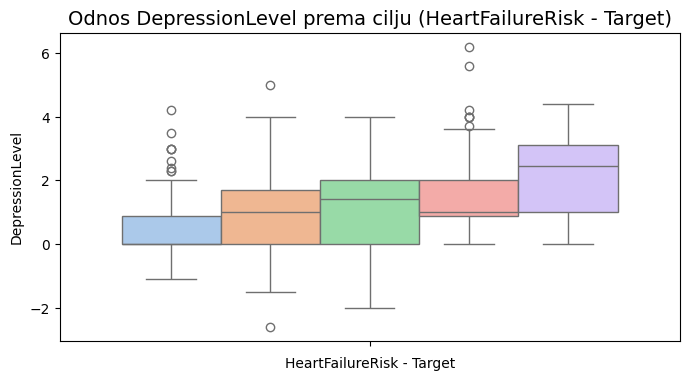

In [117]:
import seaborn as sns

# 1. Distribucija numeričkih značajki
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle("Distribucija numeričkih značajki", fontsize=16)
plt.show()

# 2. Korelacijska matrica
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacijska matrica numeričkih značajki", fontsize=16)
plt.show()

# 3. Učestalost kategoričkih značajki
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis', hue=col, legend=False, order=df[col].value_counts().index)
    plt.title(f"Učestalost vrijednosti za {col}", fontsize=14)
    plt.ylabel("Broj pojavljivanja")
    plt.xlabel(col)
    plt.show()

# 4. Odnos numeričkih značajki prema ciljnoj vrijednosti
for col in numeric_cols:
    if col != 'HeartFailureRisk - Target':
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, y=col, hue='HeartFailureRisk - Target', palette='pastel', legend=False)
        plt.title(f"Odnos {col} prema cilju (HeartFailureRisk - Target)", fontsize=14)
        plt.xlabel("HeartFailureRisk - Target")
        plt.ylabel(col)
        plt.show()


In [118]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # Pretvroba kategoričkih vrijednosti u numeričke
for col in ['Sex', 'ChestPainLevel', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'PeakExerciseCondition', 'ThalliumTestResult']:
    df[col] = le.fit_transform(df[col])

print(df.dtypes)


Age                            int64
Sex                            int32
ChestPainLevel                 int32
RestingBloodPressure         float64
Cholesterol                  float64
FastingBloodSugar              int64
RestingECG                     int32
MaxHeartRate                 float64
ExerciseInducedAngina          int64
DepressionLevel              float64
PeakExerciseCondition          int32
ThalliumTestResult             int32
HeartFailureRisk - Target      int64
dtype: object


In [119]:
bounds = {
    'Age': (29, 77),
    'Sex': (0, 1),
    'ChestPainLevel': (0, 3),
    'RestingBloodPressure': (94, 200),
    'Cholesterol': (126, 564),
    'FastingBloodSugar': (0, 1),
    'RestingECG': (0, 2),
    'MaxHeartRate': (71, 202),
    'ExerciseInducedAngina': (0, 1),
    'DepressionLevel': (0.0, 6.2),
    'PeakExerciseCondition': (0, 2),
    'NumberOfVesselsColored': (0, 4),
    'ThalliumTestResult': (0, 3)
}

for feature, (min_val, max_val) in bounds.items(): # micanje outliera iz dataframe-a prema pravilima za min i max vrijednosti iz članka
    if feature in df.columns:
        df = df[(df[feature] >= min_val) & (df[feature] <= max_val)]

df.shape

(741, 13)

In [120]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Korištenje standardscalera kako bi se skalirale vrijednosti za kasnije korištenje u modelima(bolji rezultati i brže učenje)
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [121]:
df.head(8)

,Age,Sex,ChestPainLevel,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,DepressionLevel,PeakExerciseCondition,ThalliumTestResult,HeartFailureRisk - Target
0,1.064088,1,3,0.710614,-0.219179,2.274863,0,0.369672,-0.726523,1.328411,0,0,-0.758512
1,1.486418,1,0,1.582515,0.742381,-0.439587,0,-1.381192,1.376420,0.573754,1,1,1.051656
2,1.486418,1,0,-0.742555,-0.291749,-0.439587,0,-0.505760,1.376420,1.611407,1,2,0.146572
3,-1.681054,1,2,-0.161287,0.089246,-0.439587,1,1.912099,-0.726523,2.460395,0,1,-0.758512
4,-1.258724,0,1,-0.161287,-0.745315,-0.439587,0,1.286791,-0.726523,0.479422,2,1,-0.758512
5,0.325011,1,1,-0.742555,-0.164751,-0.439587,1,1.536914,-0.726523,-0.086570,2,1,-0.758512
6,0.958506,0,0,0.419980,0.415814,-0.439587,0,0.786544,-0.726523,2.554727,0,1,1.956740
7,0.430594,0,0,-0.742555,1.976081,-0.439587,1,0.911606,1.376420,-0.275235,2,1,-0.758512
